# Probabilistic Graphical Models : Homework 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#to load a data set
def load_set(file_name):
    with open(file_name) as f:
        content = []
        for line in f:
            x1, x2, y = line.split()
            content.append([np.array([np.float(x1), np.float(x2)]), np.int(np.float(y))])
    content = np.array(content)
    x, y = zip(*content)
    return np.array(x), np.array(y)

In [3]:
x,y = load_set("classificationA.train")
x_test,y_test = load_set("classificationA.test")

## LDA

The line $P(Y=1|x) = 0.5$ is of the form $a^Tx  =b$ with $a^T = 2(\mu_2-\mu_1)^T\Sigma^{-1}$ and 
$b = 2\log(\frac{\pi}{1-pi})-\mu_1^T\Sigma^{-1}\mu_1+\mu_2^T\Sigma^{-1}\mu_2$

In [4]:
class LDA():
    # compute pi, sigma, mu1, mu2            
    def fit(self,x,y):
        N = len(y)
        self.pi = np.sum(y)/N
        self.mu1 = np.sum(np.multiply(x.T,y), axis = 1)/np.sum(y)
        self.mu2 = np.sum(np.multiply(x.T,1-y), axis = 1)/np.sum(1-y)
        self.sigma = (np.multiply(y,np.subtract(x,self.mu1).T).dot(np.subtract(x,self.mu1))\
                      +np.multiply(1-y,np.subtract(x,self.mu2).T).dot(np.subtract(x,self.mu2)))/N
        return(self)
    
    # show the line of P(y=1|x)=0.5
    # it is of the form a*X = b
    def plot_split_line(self,x,y):
        sig_inv = np.linalg.inv(self.sigma)
        a = 2*(self.mu2-self.mu1).T.dot(sig_inv)
        b = 2*np.log(self.pi/(1-self.pi))-self.mu1.T.dot(sig_inv.dot(self.mu1))+self.mu2.T.dot(sig_inv.dot(self.mu2))
        self.X = np.linspace(min(x[:,0]),max(x[:,0]), 100)
        self.Y = (b - a[0]*self.X)/a[1]
        x0 = x[y==0]
        x1 = x[y==1]
        plt.figure(figsize = (10,6))
        plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
        plt.scatter(x0[:,0], x0[:,1], c='r')
        plt.scatter(x1[:,0], x1[:,1], c='b')
        plt.plot(self.X,self.Y)
        plt.title("Train Set with LDA")
        plt.show()
    
    #predict the class of each vector of x
    def predict(self, x):
        sig_inv = np.linalg.inv(self.sigma)
        w = 2*(self.mu2-self.mu1).T.dot(sig_inv)
        b = 2*np.log(self.pi/(1-self.pi))-self.mu1.T.dot(sig_inv.dot(self.mu1))\
                                        +self.mu2.T.dot(sig_inv.dot(self.mu2))
        prediction = []
        for i in range(x.shape[0]):
            prediction.append(1*(w.dot(x[i])-b < 0))
        return(np.array(prediction))
        

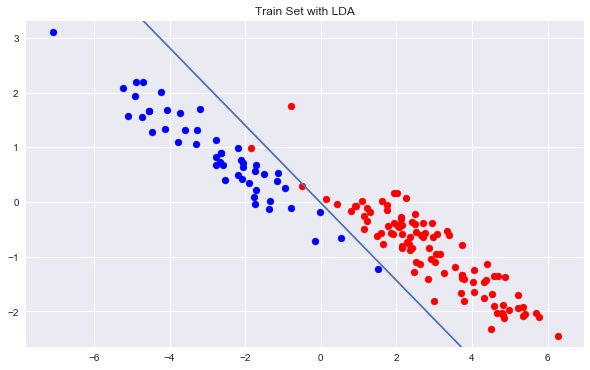

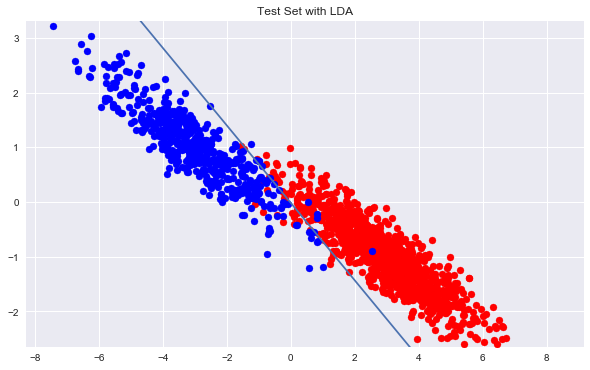

In [5]:
lda = LDA()
lda.fit(x,y)
lda.plot_split_line(x,y)
#plot the prediction line on the test set
x0 = x_test[y_test==0]
x1 = x_test[y_test==1]
plt.figure(figsize = (10,6))
#class 0 is in red, 1 is in blue
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
plt.plot(lda.X, lda.Y)
plt.title("Test Set with LDA")
plt.show()

## Logistic Regression


In [6]:
class LogReg():
    
    def fit(self, x, y):
        #add a line of 1 to x
        xbis = np.concatenate((x, np.ones(x.shape[0]).reshape((x.shape[0],1))), axis = 1)
        
        def sigmoid(z):
            return(1/(1+np.exp(-z)))
        def gradient(w):
            eta = np.array([sigmoid(w.T.dot(xbis[i])) for i in range(xbis.shape[0])])
            return(-xbis.T.dot(y-eta))
        def hessian(w):
            eta = np.array([sigmoid(w.T.dot(xbis[i])) for i in range(xbis.shape[0])])
            return (xbis.T.dot(np.diag(eta*(1-eta))).dot(xbis))
        
        #gradient descent with Newton's method
        self.w = np.array([0.,0.,0.])
        g = gradient(self.w)
        h = hessian(self.w)
        #stoping criteria on the norm of the gradient
        while (np.linalg.norm(g) > 0.001):  
            self.w -= np.linalg.inv(h).dot(g)
            g = gradient(self.w)
            h = hessian(self.w)
        return(self)
                   
    def plot_split_line(self,x,y):
        self.X = np.linspace(min(x[:,0]),max(x[:,0]), 100)
        self.Y = (-self.w[2] - self.w[0]*self.X)/self.w[1]
        x0 = x[y==0]
        x1 = x[y==1]
        plt.figure(figsize = (10,6))
        plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
        plt.scatter(x0[:,0], x0[:,1], c='r')
        plt.scatter(x1[:,0], x1[:,1], c='b')
        plt.plot(self.X,self.Y)
        plt.title("Train Set with Logistic Regression")
        plt.show()
                   
    def predict(self, x):
        prediction = []
        for i in range(x.shape[0]):
            prediction.append(1*(self.w[:2].dot(x[i])+self.w[2] > 0))
        return(np.array(prediction))
    
    

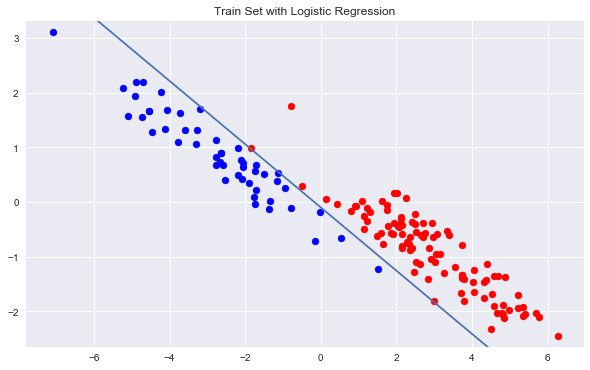

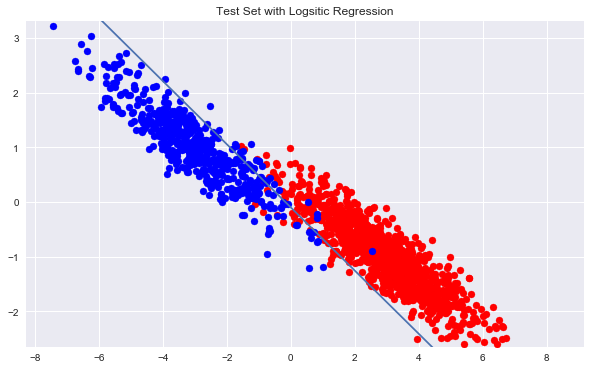

In [7]:
log = LogReg()
log.fit(x,y)
log.plot_split_line(x,y)
#plot the prediction on the test set
x0 = x_test[y_test==0]
x1 = x_test[y_test==1]
plt.figure(figsize = (10,6))
#class 0 is in red, 1 is in blue
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
plt.plot(log.X,log.Y)
plt.title("Test Set with Logsitic Regression")
plt.show()

## Linear Regression

In [8]:
class Linear_Regression():
    
    def fit(self,x,y):
        #add a line of 1 to x
        xbis = np.concatenate((x, np.ones(x.shape[0]).reshape((x.shape[0],1))), axis = 1)
        self.w = np.linalg.inv(xbis.T.dot(xbis)).dot(xbis.T).dot(y)
        
    def plot_split_line(self,x,y):
        self.X = np.linspace(min(x[:,0]),max(x[:,0]), 100)
        self.Y = (-self.w[2] - self.w[0]*self.X + 0.5)/self.w[1]
        x0 = x[y==0]
        x1 = x[y==1]
        plt.figure(figsize = (10,6))
        plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
        plt.scatter(x0[:,0], x0[:,1], c='r')
        plt.scatter(x1[:,0], x1[:,1], c='b')
        plt.plot(self.X,self.Y)
        plt.title("Train Set with Linear Regression")
        plt.show()
                   
    def predict(self, x):
        prediction = []
        for i in range(x.shape[0]):
            prediction.append(1*(self.w[:2].dot(x[i])+self.w[2] > 0.5))
        return(np.array(prediction))

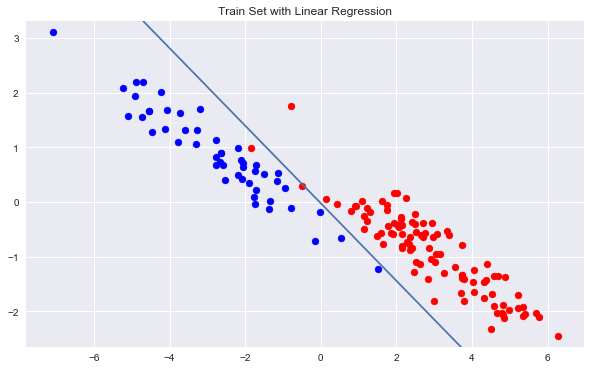

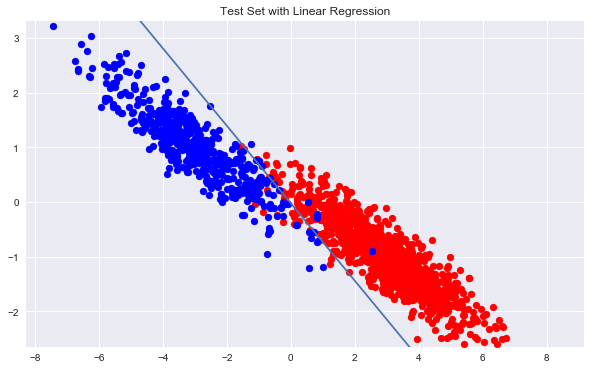

In [9]:
lin = Linear_Regression()
lin.fit(x,y)
lin.plot_split_line(x,y)
#plot the prediction on the test set
x0 = x_test[y_test==0]
x1 = x_test[y_test==1]
plt.figure(figsize = (10,6))
#class 0 is in red, 1 is in blue
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
plt.plot(lin.X,lin.Y)
plt.title("Test Set with Linear Regression")
plt.show()

## Comparison

In [10]:
def error(prediction, y):
    return(np.sum(prediction!=y)/len(y))

classifier = [["LDA",LDA()], ["Logistic_Regression", LogReg()], ["Linear_regression",Linear_Regression()]]

Sets = ["A", "B", "C"]
for Set in Sets:
    xtrain,ytrain = load_set("classification"+Set+".train")
    xtest,ytest = load_set("classification"+Set+".test")
    for c in classifier:
        c[1].fit(xtrain,ytrain)
        print(c[0] + " Training error in set "+Set+ " : " + str(error(c[1].predict(xtrain),ytrain)))
        print(c[0] + " Test error in set "+Set+" : " + str(error(c[1].predict(xtest),ytest)))
        print('\t')
    print('------------------------------')

LDA Training error in set A : 0.013333333333333334
LDA Test error in set A : 0.02
	
Logistic_Regression Training error in set A : 0.0
Logistic_Regression Test error in set A : 0.034666666666666665
	
Linear_regression Training error in set A : 0.013333333333333334
Linear_regression Test error in set A : 0.020666666666666667
	
------------------------------
LDA Training error in set B : 0.03
LDA Test error in set B : 0.0415
	
Logistic_Regression Training error in set B : 0.02
Logistic_Regression Test error in set B : 0.043
	
Linear_regression Training error in set B : 0.03
Linear_regression Test error in set B : 0.0415
	
------------------------------
LDA Training error in set C : 0.055
LDA Test error in set C : 0.042333333333333334
	
Logistic_Regression Training error in set C : 0.04
Logistic_Regression Test error in set C : 0.02266666666666667
	
Linear_regression Training error in set C : 0.055
Linear_regression Test error in set C : 0.042333333333333334
	
-----------------------------

## QDA

The conic $P(Y=1|x) = 0.5$ is of the form $x^Tax+b^Tx + c =0$ with $a = (\Sigma^{-1}_1-\Sigma^{-1}_2)^T$,
$b^T = 2(\mu_2^T\Sigma_2^{-1}-\mu_1^T\Sigma^{-1}_1)$
and $c = \log(\frac{|\Sigma_1|}{|\Sigma_2|})-2\log(\frac{\pi}{1-|pi})+\mu_1^T\Sigma^{-1}\mu_1-\mu_2^T\Sigma^{-1}\mu_2$

In [11]:
class QDA():
                
    def fit(self,x,y):
        N = len(y)
        self.pi = np.sum(y)/N
        self.mu1 = np.sum(np.multiply(x.T,y), axis = 1)/np.sum(y)
        self.mu2 = np.sum(np.multiply(x.T,1-y), axis = 1)/np.sum(1-y)
        self.sigma1 = np.multiply(y,np.subtract(x,self.mu1).T).dot(np.subtract(x,self.mu1))/N
        self.sigma2 = np.multiply(1-y,np.subtract(x,self.mu2).T).dot(np.subtract(x,self.mu2))/N         
        return(self)
    
    def plot_split_line(self,x,y):
        sig_inv1 = np.linalg.inv(self.sigma1)
        sig_inv2 = np.linalg.inv(self.sigma2)
        # compute A, B and C
        A = (sig_inv1-sig_inv2)
        B = 2*(self.mu2.T.dot(sig_inv2)-self.mu1.T.dot(sig_inv1))
        C = np.log(np.linalg.det(self.sigma1)/np.linalg.det(self.sigma2))-2*np.log(self.pi/(1-self.pi))+self.mu1.T.dot(sig_inv1.dot(self.mu1))-self.mu2.T.dot(sig_inv2.dot(self.mu2))
        # grid where the conic will be drawn
        self.X = np.linspace(min(x[:,0]),max(x[:,0]), 100)
        self.Y = np.linspace(min(x[:,1]),max(x[:,1]), 100)
        self.X, self.Y = np.meshgrid(self.X, self.Y)
        self.Z = A[0,0]*self.X**2+2*A[0,1]*self.X*self.Y+A[1,1]*self.Y**2+B[0]*self.X+B[1]*self.Y+C
        plt.figure(figsize=(10,6))
        #draw the conic of level 0 ( Z = 0)
        plt.contour(self.X,self.Y, self.Z, [0])
        x0 = x[y==0]
        x1 = x[y==1]
        plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
        plt.scatter(x0[:,0], x0[:,1], c='r')
        plt.scatter(x1[:,0], x1[:,1], c='b')
        plt.title("Train Set with QDA")
        plt.show()
    
    def predict(self, x):
        sig_inv1 = np.linalg.inv(self.sigma1)
        sig_inv2 = np.linalg.inv(self.sigma2)
        A = (sig_inv1-sig_inv2)
        B = 2*(self.mu2.T.dot(sig_inv2)-self.mu1.T.dot(sig_inv1))
        C = np.log(np.linalg.det(self.sigma1)/np.linalg.det(self.sigma2))-2*np.log(0.5*self.pi/(1-self.pi))+self.mu1.T.dot(sig_inv1.dot(self.mu1))-self.mu2.T.dot(sig_inv2.dot(self.mu2))

        prediction = []
        for i in range(x.shape[0]):
            prediction.append(1*(A[0,0]*x[i,0]**2+2*A[0,1]*x[i,0]*x[i,1]+A[1,1]*x[i,1]**2+B[0]*x[i,0]+B[1]*x[i,1]+C < 0))
        return(np.array(prediction))

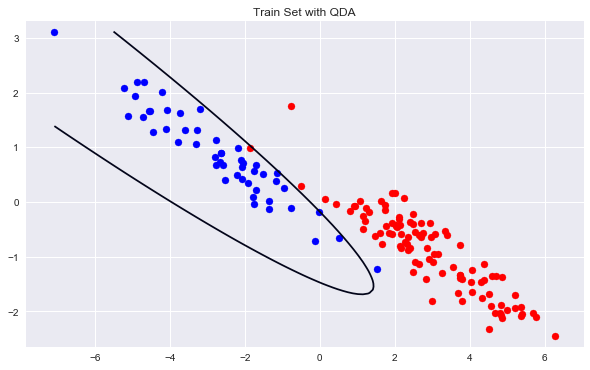

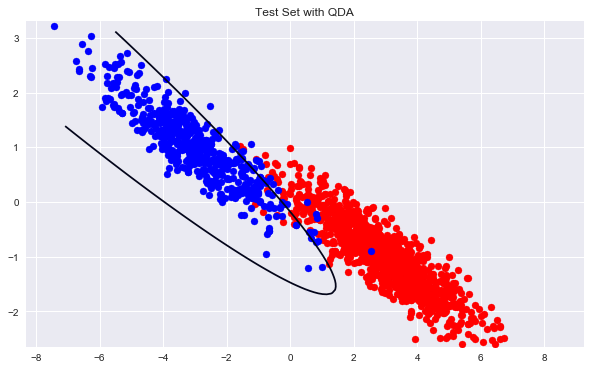

In [12]:
qda = QDA()
qda.fit(x,y)
qda.plot_split_line(x,y)
x0 = x_test[y_test==0]
x1 = x_test[y_test==1]
plt.figure(figsize=(10,6))
plt.contour(qda.X,qda.Y, qda.Z, [0])
plt.scatter(x0[:,0], x0[:,1], c='r')
plt.scatter(x1[:,0], x1[:,1], c='b')
plt.ylim(bottom = min(x[:,1])-0.2, top = max(x[:,1]+0.2 ))
plt.title("Test Set with QDA")
plt.show()

In [13]:
Sets = ["A", "B", "C"]
qda = QDA()
for Set in Sets:
    xtrain,ytrain = load_set("classification"+Set+".train")
    xtest,ytest = load_set("classification"+Set+".test")
    qda.fit(xtrain,ytrain)
    print("QDA Training error in set "+Set+ " : " + str(error(qda.predict(xtrain),ytrain)))
    print("QDA Test error in set "+Set+" : " + str(error(qda.predict(xtest),ytest)))
    print('\t')

QDA Training error in set A : 0.02
QDA Test error in set A : 0.030666666666666665
	
QDA Training error in set B : 0.016666666666666666
QDA Test error in set B : 0.0215
	
QDA Training error in set C : 0.05
QDA Test error in set C : 0.041
	


####  Work done by Matthis Maillard